
Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


Epoch 1/50


138/138 [==============================] - 1292s 9s/step - loss: 0.6853 - accuracy: 0.5501 - val_loss: 0.6849 - val_accuracy: 0.4757
Epoch 2/50
138/138 [==============================] - 779s 6s/step - loss: 0.6701 - accuracy: 0.5681 - val_loss: 0.6359 - val_accuracy: 0.6597
Epoch 3/50
138/138 [==============================] - 648s 5s/step - loss: 0.6456 - accuracy: 0.6014 - val_loss: 0.6313 - val_accuracy: 0.5000
Epoch 4/50
138/138 [==============================] - 441s 3s/step - loss: 0.6091 - accuracy: 0.6463 - val_loss: 0.5792 - val_accuracy: 0.6771
Epoch 5/50
138/138 [==============================] - 396s 3s/step - loss: 0.5729 - accuracy: 0.6842 - val_loss: 0.6374 - val_accuracy: 0.5833
Epoch 6/50
138/138 [==============================] - 413s 3s/step - loss: 0.5389 - accuracy: 0.7162 - val_loss: 0.6062 - val_accuracy: 0.6319
Epoch 7/50
138/138 [==============================] -

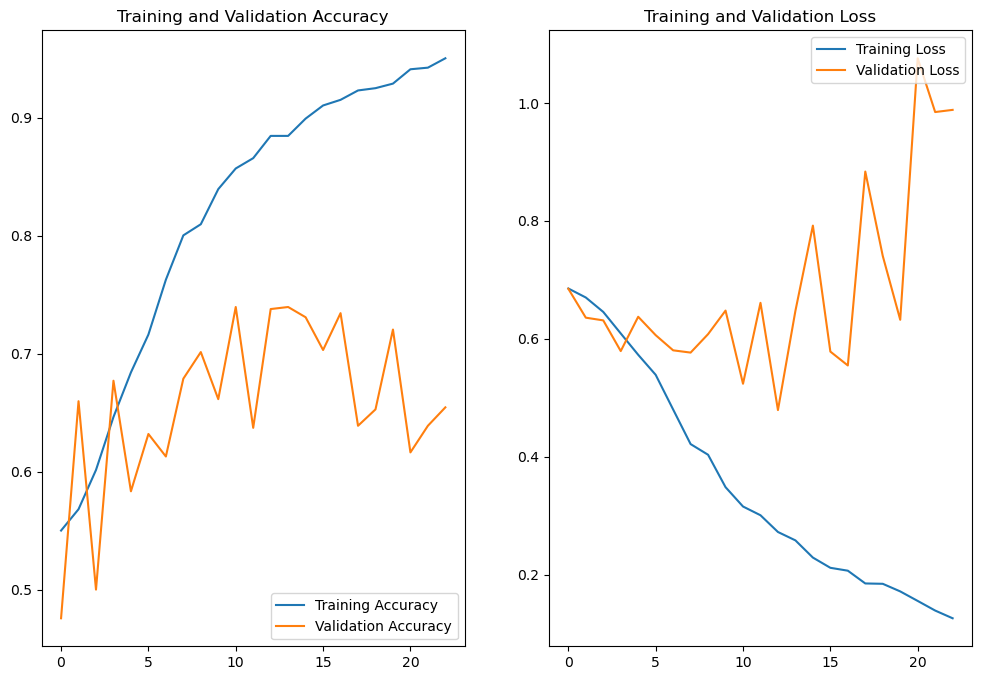

C:\Users\nsona\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Directories for training and testing data
train_dir = 'BoneFractureDataset\\training'
test_dir = 'BoneFractureDataset\\testing'

# Data generators with data augmentation for training and rescaling for testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Creating the training and testing data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary'
)

# Building the Convolutional Neural Network model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[early_stopping]
)

# Evaluating the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test Accuracy: {test_acc:.2f}')

# Plotting training & validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Saving the model
model.save('fracture_detection_model_1.h5')


In [2]:
model.save('fracture_detection_model_1.keras')


In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load your combined model
model = load_model('fracture_detection_model_1.keras')

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Adjust target size to (150, 150)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image array
    return img_array

def predict_single_image(img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    #print(f"Prediction raw output: {prediction}")  # Debugging print

    return prediction[0]

# Example usage
image_paths = [
    'BoneFractureDataset/testing/fractured/1.jpg',
    'BoneFractureDataset/testing/fractured/1-rotated1.jpg',
    'BoneFractureDataset/testing/fractured/1-rotated1-rotated1.jpg',
    'BoneFractureDataset/testing/fractured/1-rotated1-rotated1-rotated1.jpg',
    'BoneFractureDataset/testing/fractured/1-rotated1-rotated1-rotated2.jpg',
    'BoneFractureDataset/testing/fractured/1-rotated1-rotated1-rotated3.jpg',
    'BoneFractureDataset/testing/fractured/2.jpg',

]

for image_path in image_paths:
  prediction = predict_single_image(image_path)
  if prediction >= 0.5:
    print("The image is predicted to be fractured.")
  else:
    print("The image is predicted to be not fractured.")


1/1 [==============================] - 0s 195ms/step
The image is predicted to be fractured.
1/1 [==============================] - 0s 65ms/step
The image is predicted to be not fractured.
1/1 [==============================] - 0s 64ms/step
The image is predicted to be fractured.
1/1 [==============================] - 0s 48ms/step
The image is predicted to be fractured.
1/1 [==============================] - 0s 73ms/step
The image is predicted to be fractured.
1/1 [==============================] - 0s 71ms/step
The image is predicted to be not fractured.
1/1 [==============================] - 0s 44ms/step
The image is predicted to be not fractured.
